### Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? 
### Varsa bunu nasıl açıklayabilirsiniz?
### Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?
### Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sp= pd.read_csv("studentperformance.csv")

sp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [76]:
sp.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [77]:
sp.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [78]:
new_sutun = ['Gender','Race','Parent_level','Lunch','test_preparation_course',"math_score","reading_score","writing_score"]
sp.columns = new_sutun


In [79]:
sp.Parent_level.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [80]:
def aileyi_kategorize_et(adet):
    if adet == 'some high school':
        return 1
    elif adet =='high school':
        return 2
    elif adet =="associate's degree":
        return 3
    elif adet =="bachelor's degree":
        return 4
    elif adet =='some college':
        return 5
    else:
        return 6

In [81]:
sp['aile_grup'] =sp['Parent_level'].apply(aileyi_kategorize_et)
display(sp.head())
sp.groupby("aile_grup")["Parent_level"].count()

,Gender,Race,Parent_level,Lunch,test_preparation_course,math_score,reading_score,writing_score,aile_grup
0,female,group B,bachelor's degree,standard,none,72,72,74,4
1,female,group C,some college,standard,completed,69,90,88,5
2,female,group B,master's degree,standard,none,90,95,93,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,3
4,male,group C,some college,standard,none,76,78,75,5


aile_grup
1    179
2    196
3    222
4    118
5    226
6     59
Name: Parent_level, dtype: int64

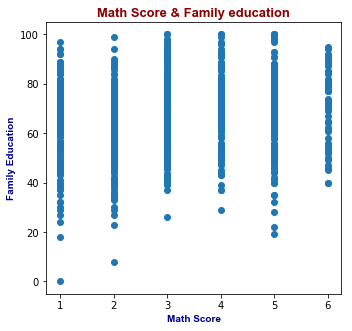

In [82]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["aile_grup"], sp["math_score"])
plt.title("Math Score & Family education", fontdict=baslik_font)
plt.xlabel('Math Score', fontdict=eksen_font )
plt.ylabel('Family Education', fontdict=eksen_font )

plt.show()

Text(0, 0.5, 'Family Education')

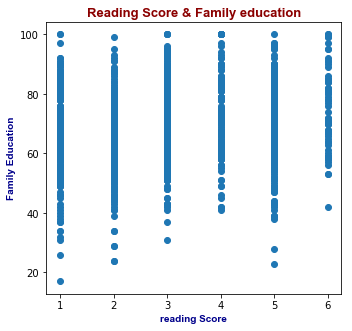

In [57]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["aile_grup"], sp["reading_score"])
plt.title("Reading Score & Family education", fontdict=baslik_font)
plt.xlabel('reading Score', fontdict=eksen_font )
plt.ylabel('Family Education', fontdict=eksen_font )

Text(0, 0.5, 'Math Score')

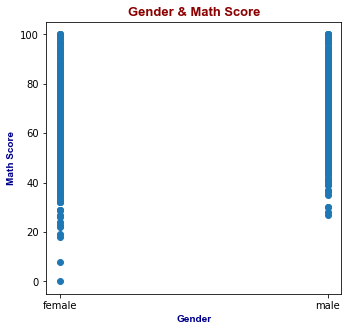

In [90]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["Gender"], sp["math_score"])
plt.title("Gender & Math Score", fontdict=baslik_font)
plt.xlabel('Gender', fontdict=eksen_font )
plt.ylabel('Math Score', fontdict=eksen_font )

Text(0, 0.5, 'reading score')

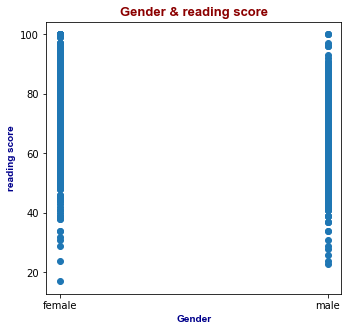

In [91]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["Gender"], sp["reading_score"])
plt.title("Gender & reading score", fontdict=baslik_font)
plt.xlabel('Gender', fontdict=eksen_font )
plt.ylabel('reading score', fontdict=eksen_font )

Text(0, 0.5, 'writing score')

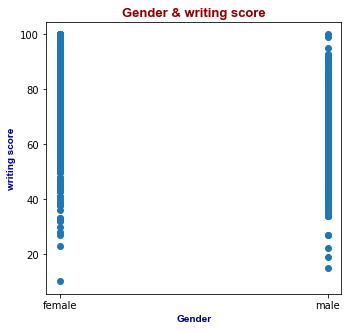

In [92]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["Gender"], sp["writing_score"])
plt.title("Gender & writing score", fontdict=baslik_font)
plt.xlabel('Gender', fontdict=eksen_font )
plt.ylabel('writing score', fontdict=eksen_font )

Text(0, 0.5, 'Math Score')

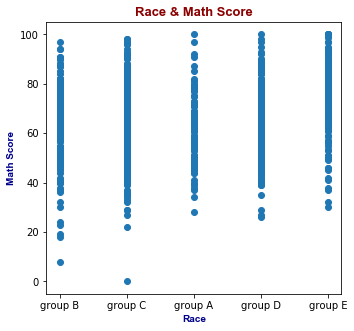

In [85]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["Race"], sp["math_score"])
plt.title("Race & Math Score", fontdict=baslik_font)
plt.xlabel('Race', fontdict=eksen_font )
plt.ylabel('Math Score', fontdict=eksen_font )

Text(0, 0.5, 'Reading Score')

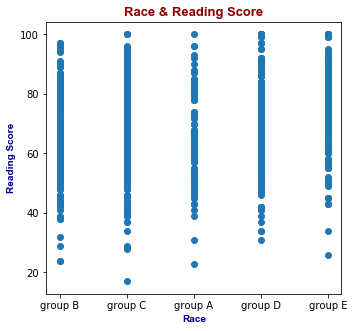

In [62]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.subplot(1,3,1)
plt.scatter(sp["Race"], sp["reading_score"])
plt.title("Race & Reading Score", fontdict=baslik_font)
plt.xlabel('Race', fontdict=eksen_font )
plt.ylabel('Reading Score', fontdict=eksen_font )

Text(0, 0.5, 'Writing score')

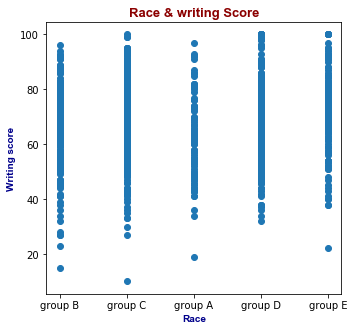

In [86]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["Race"], sp["writing_score"])
plt.title("Race & writing Score", fontdict=baslik_font)
plt.xlabel('Race', fontdict=eksen_font )
plt.ylabel('Writing score', fontdict=eksen_font )

Text(0, 0.5, 'Math score')

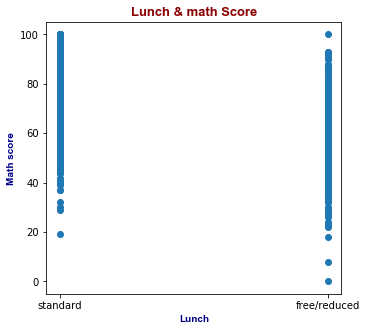

In [65]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["Lunch"], sp["math_score"])
plt.title("Lunch & math Score", fontdict=baslik_font)
plt.xlabel('Lunch', fontdict=eksen_font )
plt.ylabel('Math score', fontdict=eksen_font )

Text(0, 0.5, 'Reading score')

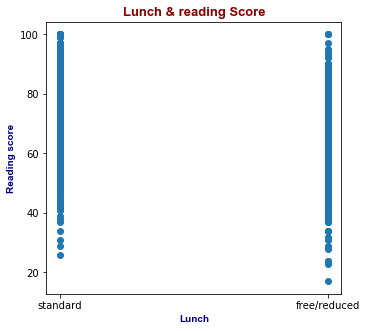

In [87]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["Lunch"], sp["reading_score"])
plt.title("Lunch & reading Score", fontdict=baslik_font)
plt.xlabel('Lunch', fontdict=eksen_font )
plt.ylabel('Reading score', fontdict=eksen_font )

Text(0, 0.5, 'Writing score')

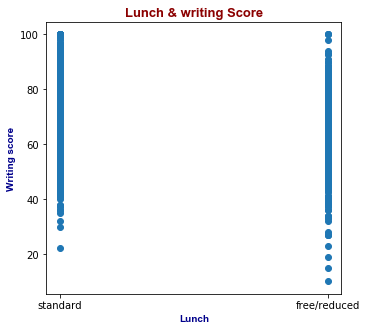

In [68]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["Lunch"], sp["writing_score"])
plt.title("Lunch & writing Score", fontdict=baslik_font)
plt.xlabel('Lunch', fontdict=eksen_font )
plt.ylabel('Writing score', fontdict=eksen_font )

Text(0, 0.5, 'Math score')

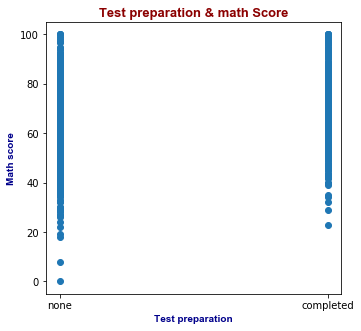

In [69]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["test_preparation_course"], sp["math_score"])
plt.title("Test preparation & math Score", fontdict=baslik_font)
plt.xlabel('Test preparation', fontdict=eksen_font )
plt.ylabel('Math score', fontdict=eksen_font )

Text(0, 0.5, 'Reading score')

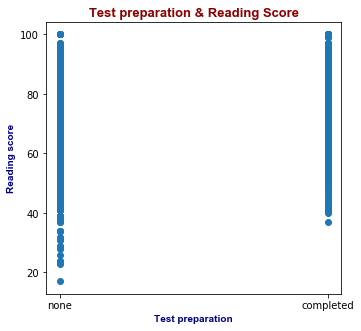

In [72]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["test_preparation_course"], sp["reading_score"])
plt.title("Test preparation & Reading Score", fontdict=baslik_font)
plt.xlabel('Test preparation', fontdict=eksen_font )
plt.ylabel('Reading score', fontdict=eksen_font )

Text(0, 0.5, 'Writing score')

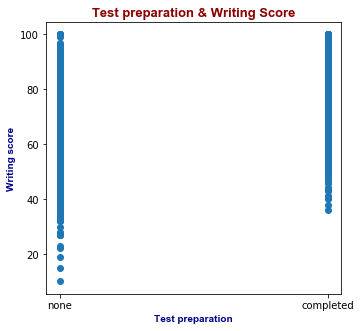

In [89]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["test_preparation_course"], sp["writing_score"])
plt.title("Test preparation & Writing Score", fontdict=baslik_font)
plt.xlabel('Test preparation', fontdict=eksen_font )
plt.ylabel('Writing score', fontdict=eksen_font )

In [94]:
korelasyon_egitim_ogrenciler = sp.corr()
display(korelasyon_egitim_ogrenciler)

,math_score,reading_score,writing_score,aile_grup
math_score,1.000000,0.817580,0.802642,0.135886
reading_score,0.817580,1.000000,0.954598,0.147570
writing_score,0.802642,0.954598,1.000000,0.192926
aile_grup,0.135886,0.147570,0.192926,1.000000


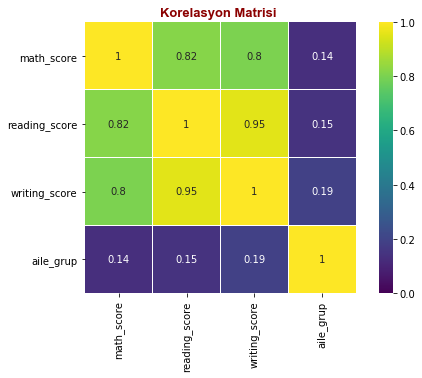

In [96]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,2)
sns.heatmap(korelasyon_egitim_ogrenciler, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi ", fontdict=baslik_font)

plt.show()